<a href="https://colab.research.google.com/github/nguyenngoctham02da/Customer-Segmentation-using-RFM-model/blob/main/RFM_clustering_by_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import plotly as py
import plotly.graph_objs as go

In [ ]:
#đọc dataset
df1_customer=pd.read_csv('/content/drive/Shareddrives/Học kì 6/R Python (Ngọc Thẩm)/Dataset/customer_segmentation_10k.csv')
df1_customer.head()

,customer_id,qtt_order,total_spent,last_order
0,0,370,189719.04,2022-10-30 07:00:00
1,1,48,159092.71,2022-06-30 12:00:00
2,2,4,28239.30,2022-08-21 01:00:00
3,3,157,378630.99,2022-06-30 04:00:00
4,4,16,84763.20,2022-03-18 20:00:00


This dataset has 4 columns including customer_id which is unique for each customer, qtt_order which is the numbers of orders each customer has, total_spent which is the amount of money customer has to pay for, last_order which is the last transaction of that customer.

# Exploring Data

In [ ]:
df1_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  int64  
 1   qtt_order    10000 non-null  int64  
 2   total_spent  10000 non-null  float64
 3   last_order   10000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


This dataset has no null value. We need the data type of last_order to datetime.

# Data Pre-processing

## Change data type

In [ ]:
df2_customer=df1_customer.copy()

In [ ]:
df2_customer['last_order']=pd.to_datetime(df2_customer['last_order'], format='%Y-%m-%d %H:%M:%S')
df2_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  10000 non-null  int64         
 1   qtt_order    10000 non-null  int64         
 2   total_spent  10000 non-null  float64       
 3   last_order   10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 312.6 KB


In [ ]:
import datetime
current_day=max(df2_customer['last_order']) + datetime.timedelta(days=1)
print(current_day)

2023-01-08 17:00:00


In [ ]:
df3_customer=df2_customer.groupby(['customer_id']).agg(
    {
        'last_order':lambda x: (current_day-x.max()).days,
        'qtt_order':'sum',
        'total_spent':'sum'
    }
).reset_index()
df3_customer.head()

,customer_id,last_order,qtt_order,total_spent
0,0,70,370,189719.04
1,1,192,48,159092.71
2,2,140,4,28239.30
3,3,192,157,378630.99
4,4,295,16,84763.20


According to RFM model, we have to calculate how many days from the last order of customer to the day that this dataset was created-it is Recency in RFM model. Because this dataset was accummulated in 2010, we cannot use today() to minus the last_order. We calculate current_day by using the max value in last_order column and plus with 1. Then we use current_day minus last_order to have Recency. 

In [ ]:
#we change the name of column according RFM model
df3_customer.rename(columns={'last_order':'Recency','qtt_order':'Frequency','total_spent':'MonetaryValue'}, inplace=True)
df3_customer.head()

,customer_id,Recency,Frequency,MonetaryValue
0,0,70,370,189719.04
1,1,192,48,159092.71
2,2,140,4,28239.30
3,3,192,157,378630.99
4,4,295,16,84763.20


In [ ]:
#we remove all of duplicate values
df3_customer.drop_duplicates()

,customer_id,Recency,Frequency,MonetaryValue
0,0,70,370,189719.04
1,1,192,48,159092.71
2,2,140,4,28239.30
3,3,192,157,378630.99
4,4,295,16,84763.20
...,...,...,...,...
9995,9995,250,30,272219.92
9996,9996,217,5,4997.42
9997,9997,346,324,61504.20
9998,9998,163,142,238317.94


## Remove outlier

### Recency

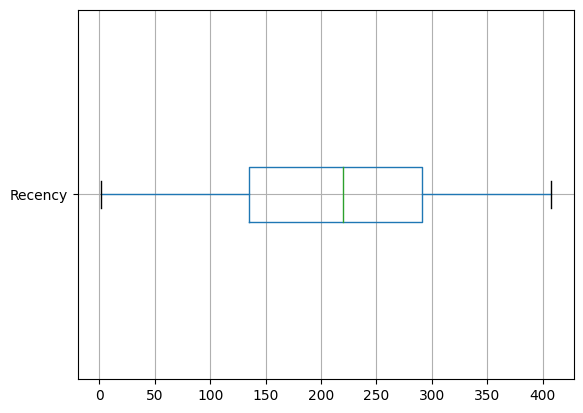

In [ ]:
df3_customer[["Recency"]].boxplot(vert=False);

There is no outlier in Recency.

### Frequency

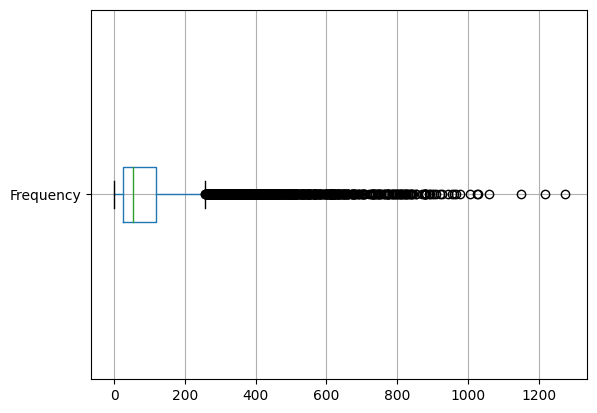

In [ ]:
df3_customer[["Frequency"]].boxplot(vert=False);

In [ ]:
#remove outlier of Frequency
Q1 = np.percentile(df3_customer['Frequency'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df3_customer['Frequency'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df3_customer.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df3_customer['Frequency']>=upper)
# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df3_customer['Frequency']<=lower)


df3_customer['Frequency'] = np.where(
   df3_customer['Frequency'] > upper,
    upper,
    np.where(
        df3_customer['Frequency'] < lower,
        lower,
        df3_customer['Frequency']))

Old Shape:  (10000, 4)


<ipython-input-14-25877d48d3e3>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df3_customer['Frequency'], 25,
<ipython-input-14-25877d48d3e3>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df3_customer['Frequency'], 75,


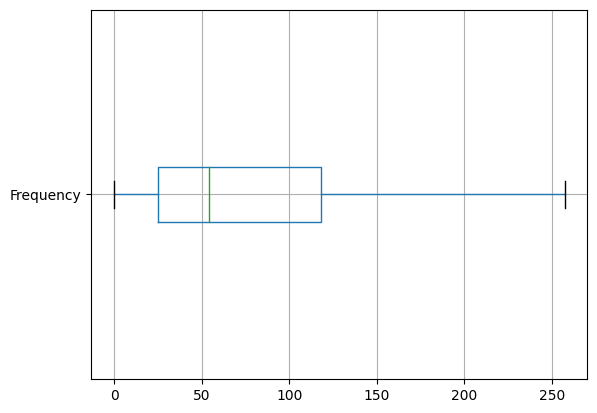

In [ ]:
df3_customer[["Frequency"]].boxplot(vert=False);

### MonetaryValue

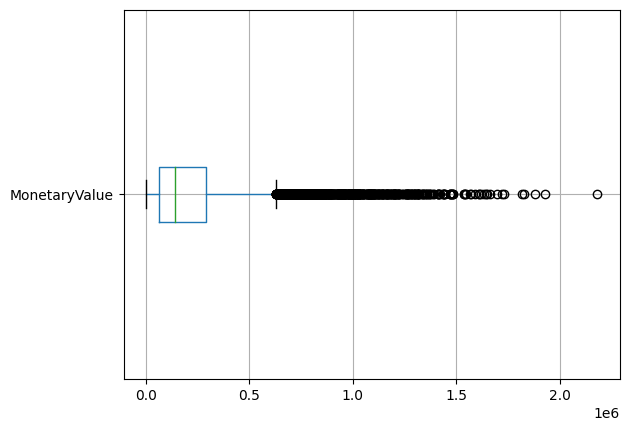

In [ ]:
df3_customer[["MonetaryValue"]].boxplot(vert=False);

In [ ]:
#remove outlier of MonetaryValue
Q1 = np.percentile(df3_customer['MonetaryValue'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df3_customer['MonetaryValue'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df3_customer.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df3_customer['MonetaryValue']>=upper)
# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df3_customer['MonetaryValue']<=lower)


df3_customer['MonetaryValue'] = np.where(
   df3_customer['MonetaryValue'] > upper,
    upper,
    np.where(
        df3_customer['MonetaryValue'] < lower,
        lower,
        df3_customer['MonetaryValue']))

Old Shape:  (10000, 4)


<ipython-input-17-9bd92342a882>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df3_customer['MonetaryValue'], 25,
<ipython-input-17-9bd92342a882>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df3_customer['MonetaryValue'], 75,


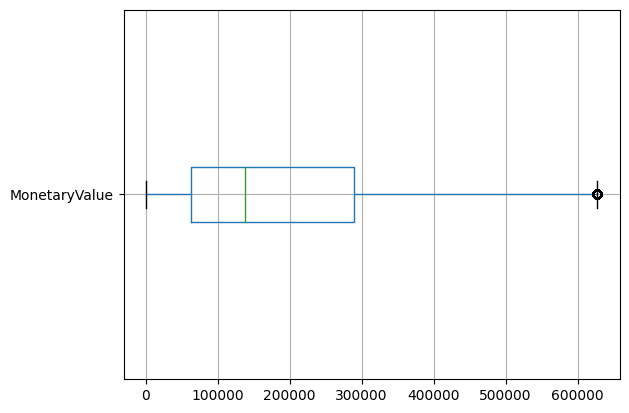

In [ ]:
df3_customer[["MonetaryValue"]].boxplot(vert=False);

## Using MinMax Scaler to scale data

Because the distribution of Recency, Frequency and Monetary is not normal distribution so we cannot use StandarScaler to scale data. Instead, we use MinMaxScaler to scale.

In [ ]:
df3_customer

,customer_id,Recency,Frequency,MonetaryValue
0,0,70,257.5,189719.0400
1,1,192,48.0,159092.7100
2,2,140,4.0,28239.3000
3,3,192,157.0,378630.9900
4,4,295,16.0,84763.2000
...,...,...,...,...
9995,9995,250,30.0,272219.9200
9996,9996,217,5.0,4997.4200
9997,9997,346,257.5,61504.2000
9998,9998,163,142.0,238317.9400


In [ ]:
df3_customer_noid=df3_customer.drop('customer_id', axis=1)

In [ ]:
df3_customer_noid[df3_customer_noid<=0].count()

Recency           0
Frequency        15
MonetaryValue     0
dtype: int64

In [ ]:
df3_customer_noid=df3_customer_noid[df3_customer_noid['Frequency'] > 0]

In [ ]:
df3_customer_noid

,Recency,Frequency,MonetaryValue
0,70,257.5,189719.0400
1,192,48.0,159092.7100
2,140,4.0,28239.3000
3,192,157.0,378630.9900
4,295,16.0,84763.2000
...,...,...,...
9995,250,30.0,272219.9200
9996,217,5.0,4997.4200
9997,346,257.5,61504.2000
9998,163,142.0,238317.9400


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df3_customer_noid)

df_customers_mmscale = pd.DataFrame(scaler.transform(df3_customer_noid))
df_customers_mmscale

,0,1,2
0,0.169533,1.000000,0.301611
1,0.469287,0.183236,0.252707
2,0.341523,0.011696,0.043762
3,0.469287,0.608187,0.603263
4,0.722359,0.058480,0.134019
...,...,...,...
9980,0.611794,0.113060,0.433347
9981,0.530713,0.015595,0.006650
9982,0.847666,1.000000,0.096879
9983,0.398034,0.549708,0.379213


# Clustering

## Choosing k based on Distortion and Silhoutte score

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_customers_mmscale)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

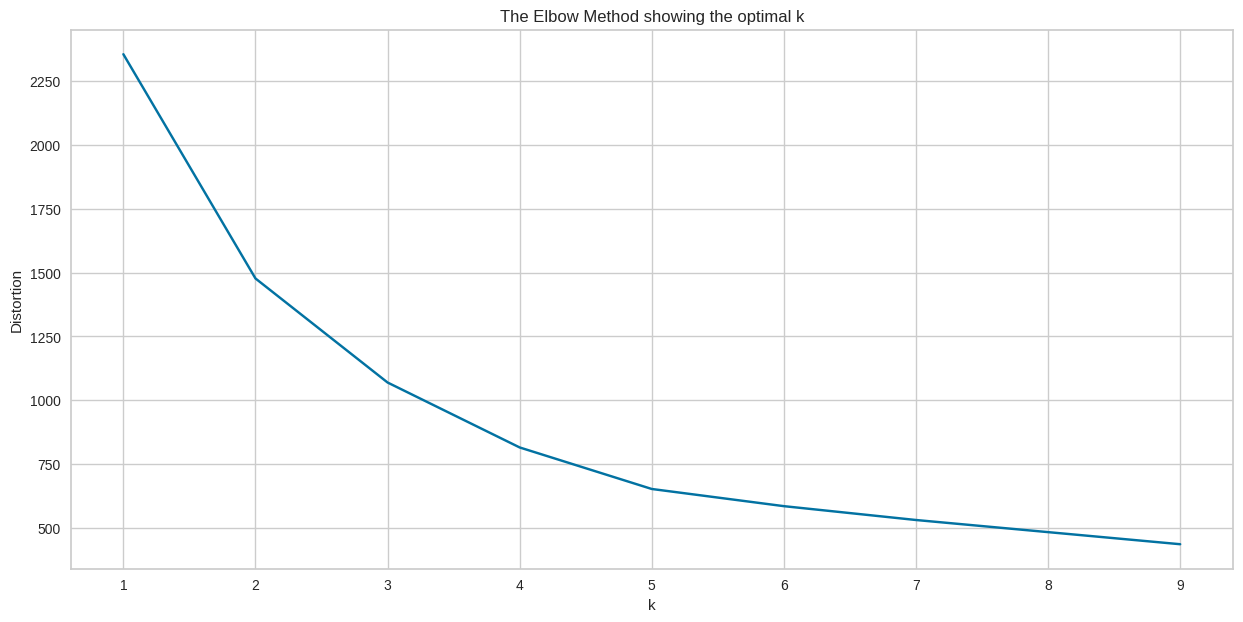

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The line of distortion is a "soft" line, which means that we cannot see the "elbow" clearly. So we will use Silhoutte score to find the most optimal k.

In [ ]:
from sklearn.cluster import KMeans
from matplotlib.legend import Shadow
from sklearn.metrics import silhouette_score
score = []
K = range(2,10)
for k in K:
    km = KMeans (n_clusters = k, random_state = 42)
    km.fit(df_customers_mmscale)
    score.append(silhouette_score (df_customers_mmscale, km.labels_, metric = 'euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

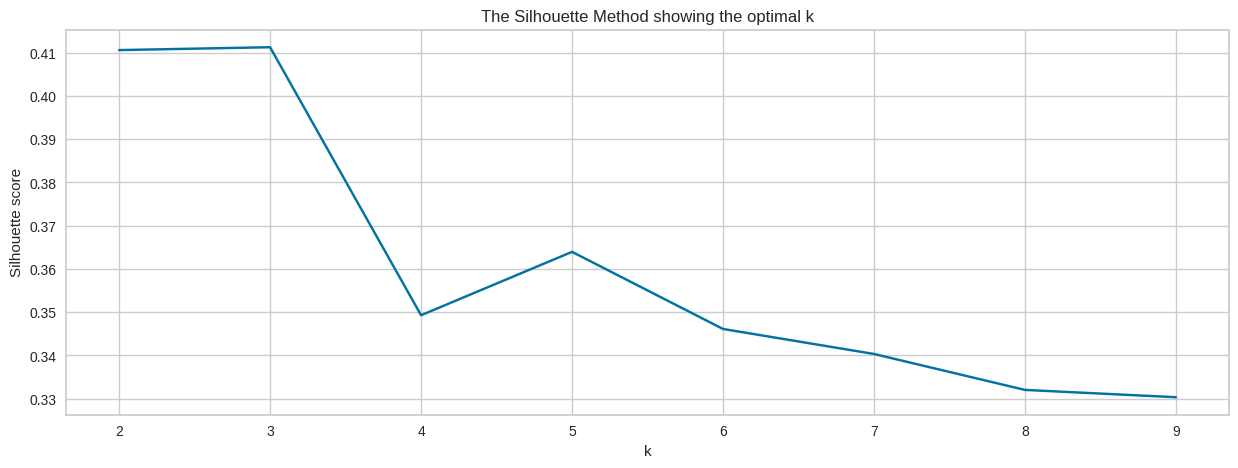

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(K, score)
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

As we see, when k=3, the Silhoutte score reaches the highest value, which means that k=3 is the most optimal k.

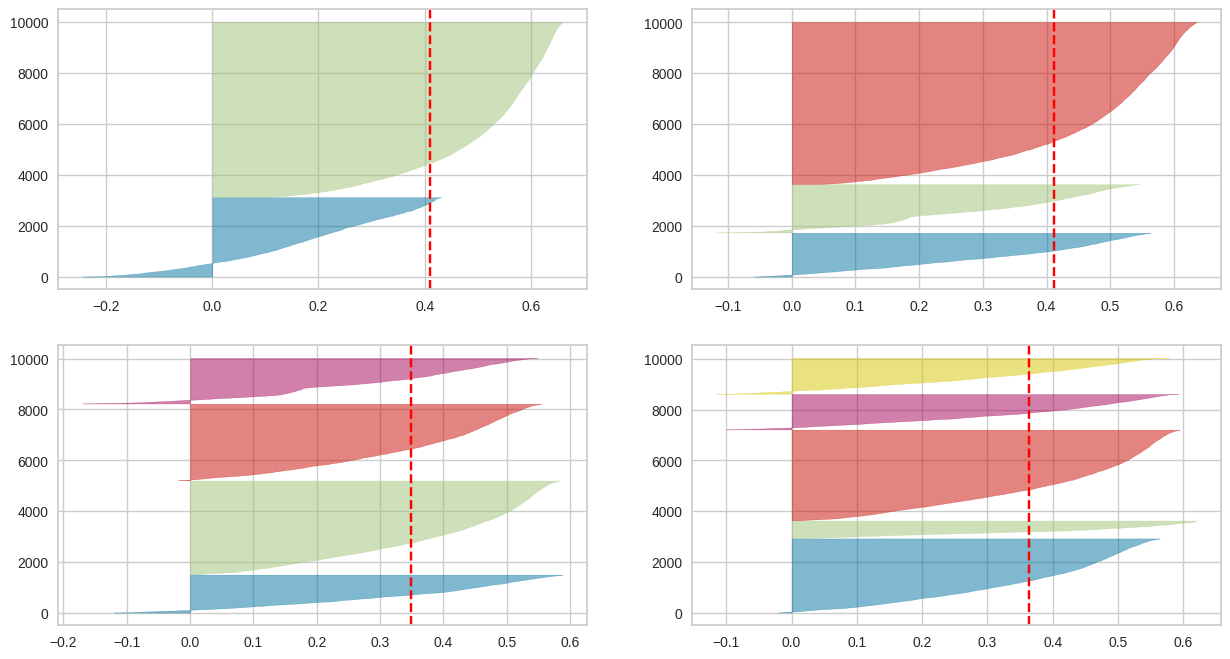

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_customers_mmscale)

## Clustering

In [ ]:
km3 = KMeans(n_clusters=3)
km3 = km3.fit(df_customers_mmscale)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels=km3.labels_
labels=pd.DataFrame(labels, columns=['Cluster'])
df1_mm_clustered=pd.concat([df_customers_mmscale,labels] , axis=1)
df1_mm_clustered

,0,1,2,Cluster
0,0.169533,1.000000,0.301611,0
1,0.469287,0.183236,0.252707,2
2,0.341523,0.011696,0.043762,2
3,0.469287,0.608187,0.603263,0
4,0.722359,0.058480,0.134019,2
...,...,...,...,...
9980,0.611794,0.113060,0.433347,2
9981,0.530713,0.015595,0.006650,2
9982,0.847666,1.000000,0.096879,0
9983,0.398034,0.549708,0.379213,0


In [ ]:
##Đo kích thước của cụm
print(km3.labels_)
df1_mm_clustered.groupby('Cluster').size()

[0 2 2 ... 0 0 1]


Cluster
0    1897
1    1725
2    6363
dtype: int64

In [ ]:
df2_mm_clustered=df1_mm_clustered.copy()
df2_mm_clustered.rename(columns={0:'Recency',1:'Frequency',2:'MonetaryValue', 'Cluster':'Cluster'}, inplace=True)
df2_mm_clustered

,Recency,Frequency,MonetaryValue,Cluster
0,0.169533,1.000000,0.301611,0
1,0.469287,0.183236,0.252707,2
2,0.341523,0.011696,0.043762,2
3,0.469287,0.608187,0.603263,0
4,0.722359,0.058480,0.134019,2
...,...,...,...,...
9980,0.611794,0.113060,0.433347,2
9981,0.530713,0.015595,0.006650,2
9982,0.847666,1.000000,0.096879,0
9983,0.398034,0.549708,0.379213,0


In [ ]:
df2_mm_clustered['labels'] = labels

trace = go.Scatter3d(
                    x = df2_mm_clustered['Recency'],
                    y = df2_mm_clustered['Frequency'],
                    z = df2_mm_clustered['MonetaryValue'],
                    mode = 'markers',
                    marker=dict(color=df2_mm_clustered['labels'], size =3, line=dict(color=df2_mm_clustered['labels'], width=15), opacity=1)
                    )

    
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'Recency'),
                                yaxis = dict(title = 'Frequency'),
                                zaxis = dict(title = 'MonetaryValue'))
                                )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

- According to the 3D chart, the blue group of customer has high Frequency (F), while the Recency (R) and Monetary (M) has a wide range so we can say that these customer buy products frequently.
- the red group of customer has high M and low F with wide range of R. This means these customer do not buy products frequently but each time they buy, they buy a lot with high value. May be this customer usually buy products in special occation such as Holiday or Discount, or they often buy luxury products. As we know, people do not buy luxury products very often. For this group of customer, the business can send them advertisement of combo product or coupon for high value order.
- The yellow group of customers has low F and M with wide range of R. This is low value group of customer because they do not buy frequently and buy a lot. For this customer, the business just need to send email for customer who bought a month ago and nearer. Because if a customer does not buy frequently and buy a little and they has not come back for a long time, they may quit.